**Chapter_3**  
**ATMOS 5040: Environmental Programming and Statistics**  
**John Horel and Derek Mallia**

Download this notebook and all images and data by downloading the ZIP file from GitHub, or use the git command:

    git clone https://github.com/johnhorel/ATMOS_5040_2020.git
    
> Note: Windows users will have to install [git for Windows](https://gitforwindows.org/) and execute the git command from the PowerShell.

# Using Python modules

`numpy` provides routines to handle arrays and many calculations efficiently and imported by convention as `np`. Numpy functions are very good at handling homogeneous data arrays (and similar in that respect to matlab functions).

`pandas` is really good at handling tabular/array data that may have heterogeneous types (floating and text, for example). It is imported by convention as `pd`. 

There are a couple sets of panda library routines  (`Series`, and `DataFrame`) used so frequently that we'll import those directly too.

`scipy` has a bunch of statistical functions and we'll import `stats` from `scipy`



`pyplot` is a _submodule_ of matplotlib. It is typically imported as the alias `plt` to handle basic plotting

In [127]:
#Aaron Test Git Push
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import matplotlib.pyplot as plt
#from matplotlib_venn import venn2,venn3

plt.figure(figsize=(10,10))
#python venn: A,B,A and B,C,A and C,B and C,A and B and C
v = venn3(subsets=(142, 83, 0, 104, 79, 25, 0), set_labels = ('Winter Storms', 'Summer Storms', 'Damage > $5000'))
plt.savefig('figure_3.1_2020.png')

#figure 3.3
plt.figure(figsize=(10,10))
#python venn: A,B,A and B
# for demonstrating union of two types of occurrences
v = venn2(subsets=(142, 104, 79), set_labels = ('Winter Storms', 'Damage > $5000'))
plt.savefig('figure_3.3_2019_python.png')

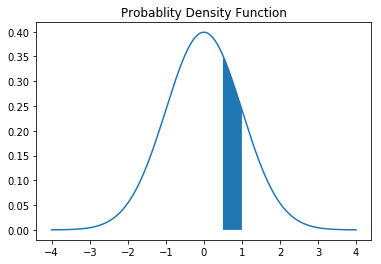

In [128]:
#figure 3.5 
title = "Probablity Density Function"
mu = 0
sigma = 1
x = np.arange(-4,4,0.001)
y = stats.norm.pdf(x, mu, sigma)
z0 = 0.5
z1 = 1
cond = (z0<x)&(x<z1)
z = x[cond]

fig,ax = plt.subplots()
ax.plot(x, y)
ax.fill_between(z, 0, stats.norm.pdf(z, mu, sigma))
ax.set_title(title)

plt.savefig('figure_3.5_2020.png')

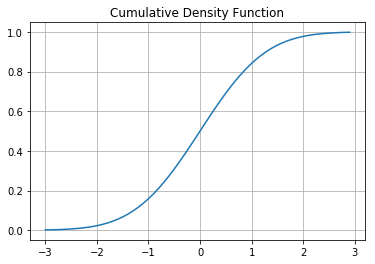

In [129]:
#figure 3.6
x = np.arange(-3,3,0.1)
fig,ax = plt.subplots()
ax.plot(x,stats.norm.cdf(x,0,1))
ax.grid()
ax.set_title("Cumulative Density Function")

plt.savefig('figure_3.6_2020.png')

empirical: mean and standard deviation 1279.8 1.19 (m)
gaussian fit: mean and standard deviation 1279.8 1.19 (m)


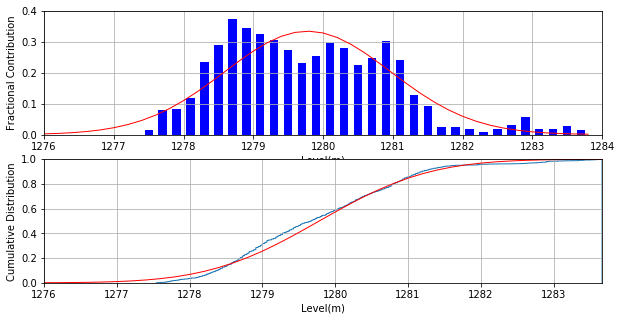

In [130]:
#figure 3.7
# plot gaussian fits to pdf and cdf of lake level

#read and then convert lake level to meters
levmon = .3048 * np.genfromtxt('../data/gsl_monthly.csv', delimiter=',', usecols=2)

fig2,(ax1,ax2) = plt.subplots(2,1,figsize=(10,5))

#get total number of values
N = len(levmon)
#set range
x = np.arange(1276,1284,0.2)
#doing as fractional contributions 
#which means probability is width (0.2)* fractional contribution
hist_val,bins = np.histogram(levmon,x,density=True)
width = 0.6 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
ax1.bar(center,hist_val,align='center',width=width,color='blue')
ax1.set(xlim=(1276,1284),ylim=(0,0.4))
ax1.set(xlabel="Level(m)",ylabel='Fractional Contribution')

#empirical values
#mean
levm = np.mean(levmon)
# unbiased estimate of pop standard deviation 
stdl = np.std(levmon,ddof=1,axis=0)

# gaussian fit to monthly lake level
(mu_g, sigma_g) = stats.norm.fit(levmon)

print("empirical: mean and standard deviation %.1f %.2f (m)" % (levm,stdl))
print("gaussian fit: mean and standard deviation %.1f %.2f (m)" % (mu_g,sigma_g))

# add a gaussian fit line for pdf
y1 = stats.norm.pdf( bins, mu_g, sigma_g)
ax1.plot(bins, y1, 'r', linewidth=1)
ax1.grid()

# plot the cumulative histogram
n2, bins2, patches = ax2.hist(levmon, N, density='True', histtype='step',
                           cumulative=True, label='Empirical')
ax2.set(xlim=(1276,max(levmon)),ylim=(0,1.0))
ax2.set(xlabel="Level(m)",ylabel='Cumulative Distribution')

# add a gaussian fit line for cdf
y2 = stats.norm.cdf(x, mu_g, sigma_g)
ax2.plot(bins, y2, 'r', linewidth=1)
ax2.grid()
plt.savefig('figure_3.7_2020.png')



In [131]:
#read the collins air temperature data
cln = np.genfromtxt('../data/alta_stns.dat',usecols=6)
print(cln)

[-6.1 -6.7 -2.2 ...  0.   0.   0. ]


empirical: mean and standard deviation -5.1 5.90 (m)
gaussian fit: mean and standard deviation -5.1 5.90 (m)


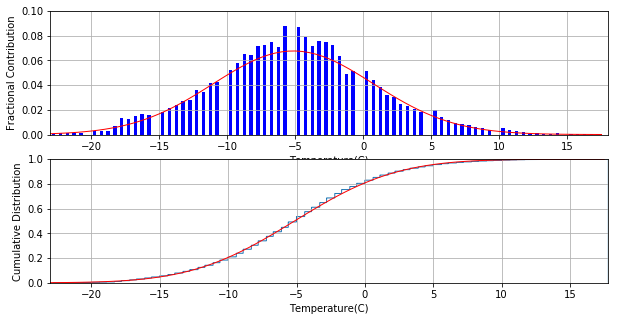

In [132]:
#figure 3.8
# plot gaussian fits to pdf and cdf of Collins Alta temperature
#empirical values
#mean
clnm = np.mean(cln)
# unbiased estimate of pop standard deviation 
stdc = np.std(cln,ddof=1,axis=0)

# gaussian fit to monthly lake level
(mu_gc, sigma_gc) = stats.norm.fit(cln)

print("empirical: mean and standard deviation %.1f %.2f (m)" % (clnm,stdc))
print("gaussian fit: mean and standard deviation %.1f %.2f (m)" % (mu_gc,sigma_gc))


fig8,(ax1,ax2) = plt.subplots(2,1,figsize=(10,5))

#get total number of values
Nc = len(cln)
#set range
xc = np.arange(-23,18,0.5)
#doing as fractional contributions 
#which means probability is width (0.5)* fractional contribution
hist_valc,binsc = np.histogram(cln,xc,density=True)
widthc = 0.5 * (binsc[1] - binsc[0])
centerc = (binsc[:-1] + binsc[1:]) / 2
ax1.bar(centerc,hist_valc,align='center',width=widthc,color='blue')
ax1.set(xlim=(-23,18),ylim=(0,0.1))
ax1.set(xlabel="Temperature(C)",ylabel='Fractional Contribution')


# add a gaussian fit line for pdf
y1c = stats.norm.pdf( binsc, mu_gc, sigma_gc)
ax1.plot(binsc, y1c, 'r', linewidth=1)
ax1.grid()

# plot the cumulative histogram
n2c, bins2c, patches = ax2.hist(cln, Nc, density='True', histtype='step',
                           cumulative=True, label='Empirical')
ax2.set(xlim=(-23,max(cln)),ylim=(0,1.0))
ax2.set(xlabel="Temperature(C)",ylabel='Cumulative Distribution')

# add a gaussian fit line for cdf
y2c = stats.norm.cdf(xc, mu_gc, sigma_gc)
ax2.plot(binsc, y2c, 'r', linewidth=1)
ax2.grid()
plt.savefig('figure_3.8_2020.png')




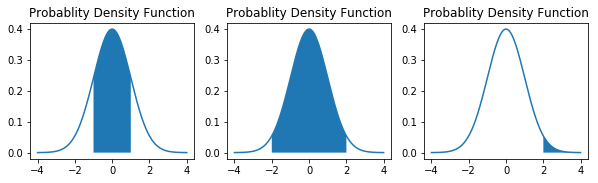

In [133]:
#figure 3.9

fig9,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,2.5))
title = "Probablity Density Function"
mu = 0
sigma = 1
x = np.arange(-4,4,0.001)
y = stats.norm.pdf(x, mu, sigma)
z0 = -1
z1 = 1
cond = (z0<x)&(x<z1)
z = x[cond]

ax1.plot(x, y)
ax1.fill_between(z, 0, stats.norm.pdf(z, mu, sigma))
ax1.set_title(title)

z0 = -2
z1 = 2
cond = (z0<x)&(x<z1)
z = x[cond]
ax2.plot(x, y)
ax2.fill_between(z, 0, stats.norm.pdf(z, mu, sigma))
ax2.set_title(title)

z0 = 2
z1 = 10
cond = (z0<x)&(x<z1)
z = x[cond]
ax3.plot(x, y)
ax3.fill_between(z, 0, stats.norm.pdf(z, mu, sigma))
ax3.set_title(title)


plt.savefig('figure_3.9_2020.png')

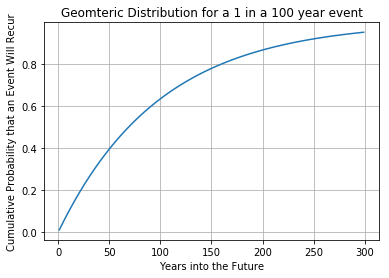

In [134]:
#figure 3.10
x = np.arange(1,300,1)
fig,ax = plt.subplots()
ax.plot(x,stats.geom.cdf(x,0.01,loc=0))
ax.grid()
ax.set_title("Geomteric Distribution for a 1 in a 100 year event")
ax.set(xlabel="Years into the Future",ylabel='Cumulative Probability that an Event Will Recur')
plt.savefig('figure_3.10_2020.png')


25524.0 523400.0000000001


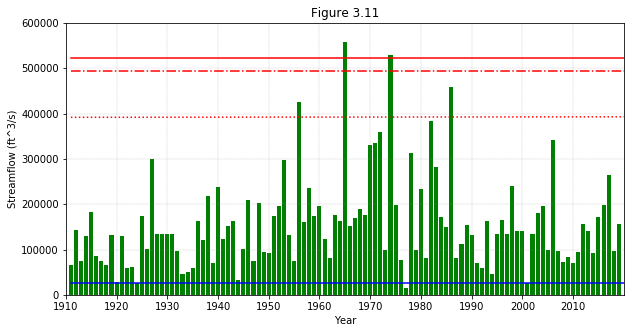

In [135]:
# figure 11
#read annual peak streamflows of klamath river from
#https://nwis.waterdata.usgs.gov/ca/nwis/peak?site_no=11530500&agency_cd=USGS&format=html
year =  np.genfromtxt('../data/klamath_river_streamflow.csv', delimiter=',', usecols=0)
flow =  np.genfromtxt('../data/klamath_river_streamflow.csv', delimiter=',', usecols=1)

#plot time series
decade_ticks = np.arange(1910,2020,10)

fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.bar(year,flow,color='green')
ax.set(xlim=(1911,2020),ylim=(0,600000))
ax.set(xlabel="Year",ylabel='Streamflow (ft^3/s)')
ax.set(xticks=decade_ticks)
ax.set(title="Figure 3.11")
ax.grid(linestyle='--', color='grey', linewidth=.2)
#compute first and 99th percentile for extreme values determined empirically
p01 = np.percentile(flow,1)
p99 = np.percentile(flow,99)
print(p01,p99)
xv = [1911,2020]
ax.plot(xv,[p99,p99],'r')
ax.plot(xv,[p01,p01],'b')
#from next code section, plot the gaussian and weibull 99th percentiles
#gaussian
ax.plot(xv,[391813,392896],'r:')
#weibull
ax.plot(xv,[493231,493231],'r-.')

plt.savefig('figure_11_2020.png')


empirical: mean and standard deviation 156739.4 101514.91 (m)
gaussian fit: mean and standard deviation 156739.4 101048.17 (m)
[     0  20000  40000  60000  80000 100000 120000 140000 160000 180000
 200000 220000 240000 260000 280000 300000 320000 340000 360000 380000
 400000 420000 440000 460000 480000 500000 520000 540000 560000 580000]
gaussian 99th 391812.64081332565
weibull 99.9th 708000.3484691184
[0.         0.00557693 0.04279434 0.11765537 0.21691308 0.32510751
 0.43088667 0.52765852 0.6124643  0.6846666  0.74492706 0.79452585
 0.83495125 0.86767322 0.89403208 0.91519466 0.93214754 0.94570892
 0.95654847 0.96520927 0.97212897 0.97765874 0.98207944 0.98561533
 0.98844521 0.99071156 0.9925279  0.99398466 0.99515389 0.99609307]


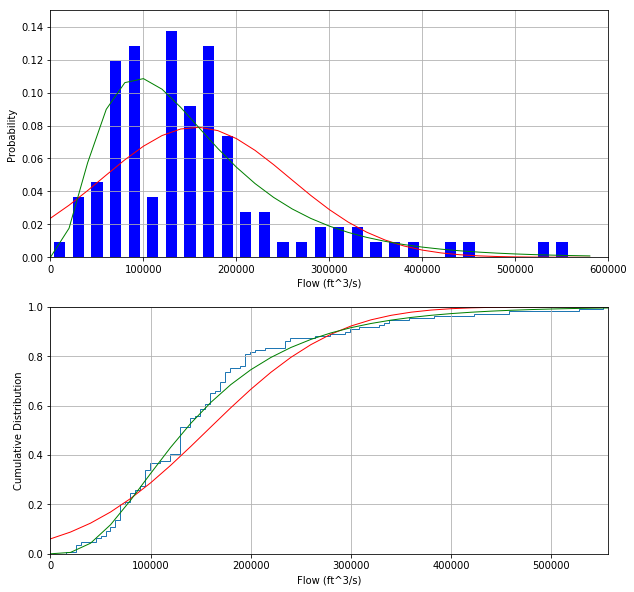

In [136]:
#figure 3.12

# plot gaussian fits to pdf and cdf of streamflow
#empirical values
#mean
flowm = np.mean(flow)
# unbiased estimate of pop standard deviation 
stdf = np.std(flow,ddof=1,axis=0)

# gaussian fit to flow
(mu_gf, sigma_gf) = stats.norm.fit(flow)

print("empirical: mean and standard deviation %.1f %.2f (m)" % (flowm,stdf))
print("gaussian fit: mean and standard deviation %.1f %.2f (m)" % (mu_gf,sigma_gf))

fig11,(ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
#display probabilities
#get total number of values
Nf = len(flow)
#set range
xf = np.arange(0,600000,20000)

#doing as fractional contributions 
#which means probability is width (20000)* fractional contribution
hist_valf,binsf = np.histogram(flow,xf,density=True)
print(binsf)
#scale for probability
hist_valf = 20000*hist_valf

width = 0.6 * (binsf[1] - binsf[0])
centerf = (binsf[:-1] + binsf[1:]) / 2
ax1.bar(centerf,hist_valf,align='center',width=width,color='blue')
ax1.set(xlim=(0,600000),ylim=(0,0.15))
ax1.set(xlabel="Flow (ft^3/s)",ylabel='Probability')

# add a gaussian fit line for pdf
ygf = stats.norm.pdf( binsf, mu_gf, sigma_gf)
#scale for probability
ygf = 20000*ygf
ax1.plot(binsf, ygf, 'r', linewidth=1)
ax1.grid()

#for  fig 3.11, determine the 99th percentile for a gaussian
p99g = stats.norm.ppf(.99, loc=mu_gf,scale=sigma_gf)

print('gaussian 99th',p99g)

# add a weibull fit line for pdf
#this is not very intuitive but due to some painful hacking
#the critical thing is to begin with initial value scale=2

params = stats.exponweib.fit(flow,scale=2,loc=0)
ywf = stats.exponweib.pdf(binsf,*params)
#scale for probability
ywf = 20000*ywf
ax1.plot(binsf, ywf, 'g', linewidth=1)

#for fig 3.11, determine the one in a thousan year peak flow event
p999w = stats.exponweib(*params).ppf(0.999)
print('weibull 99.9th',p999w)

# plot the cumulative histogram
N = len(flow)
n2f, bins2f, patches = ax2.hist(flow, N, density='True', histtype='step',
                           cumulative=True, label='Empirical')
ax2.set(xlim=(0,max(flow)),ylim=(0,1.0))
ax2.set(xlabel="Flow (ft^3/s)",ylabel='Cumulative Distribution')

# add a gaussian fit line for cdf
y2f = stats.norm.cdf(xf, mu_gf, sigma_gf)
ax2.plot(binsf, y2f, 'r', linewidth=1)

# add a weibull fit line for cdf
ywf = stats.exponweib.cdf(binsf,*params)
print(ywf)
ax2.plot(binsf, ywf, 'g', linewidth=1)
ax2.grid()
    
plt.savefig('figure_3.12_2020.png')

## 

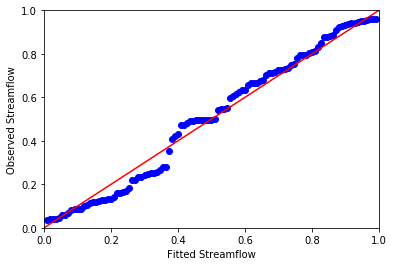

In [137]:
import statsmodels.api as sm

wfv = stats.exponweib.cdf(flow,*params)

pp_x = sm.ProbPlot(wfv, fit=True)

fig = pp_x.ppplot(line='45',xlabel='Fitted Streamflow',ylabel='Observed Streamflow')

plt.savefig('figure_3.13_2020.png')


In [138]:
#figure 14 is from  central_limit.ipynb

In [139]:
#analysis of 5-year drought episodes in Utah
yearp = np.genfromtxt('../data/utah_precip.csv', delimiter=',', usecols=0)
ppt = 2.54 * np.genfromtxt('../data/utah_precip.csv', delimiter=',', usecols=1)
print(yearp)
decade_ticks = np.arange(1900,2020,10)
pmean = np.mean(ppt)
ppta = ppt - pmean
npa = len(ppta)
# sample standard deviation and variance
ps = np.std(ppta)
# sample std deviation if central limit valid for 5 years
ps5 = ps /np.sqrt(5)
print(npa,pmean,ps,ps5)
#print("tick marks",decade_ticks)

[1895. 1896. 1897. 1898. 1899. 1900. 1901. 1902. 1903. 1904. 1905. 1906.
 1907. 1908. 1909. 1910. 1911. 1912. 1913. 1914. 1915. 1916. 1917. 1918.
 1919. 1920. 1921. 1922. 1923. 1924. 1925. 1926. 1927. 1928. 1929. 1930.
 1931. 1932. 1933. 1934. 1935. 1936. 1937. 1938. 1939. 1940. 1941. 1942.
 1943. 1944. 1945. 1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954.
 1955. 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966.
 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978.
 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990.
 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002.
 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014.
 2015. 2016. 2017. 2018. 2019.]
125 34.0884256 6.382696649910963 2.854428717792218


-12.510085433825488 12.510085433825488
-5.594680286872747 5.594680286872747


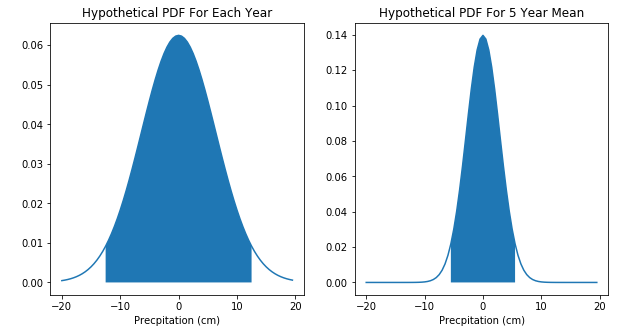

In [140]:
#figure 15

fig15,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
x = np.arange(-20,20,0.5) 
y = stats.norm.pdf(x, 0, ps) 
z0 = - 1.96 * ps 
z1 =  1.96 * ps 
print(z0,z1)
cond = (z0<x)&(x<z1) 
z = x[cond] 
ax1.plot(x, y) 
ax1.set(xlabel="Precpitation (cm)",ylabel=' ') 
ax1.fill_between(z, 0, stats.norm.pdf(z, 0, ps)) 
title= "Hypothetical PDF For Each Year" 
ax1.set_title(title)

y5 = stats.norm.pdf(x, 0, ps5) 
z0 =  -1.96 * ps5 
z1 =  1.96 * ps5 
print(z0,z1)
cond = (z0<x)&(x<z1) 
z = x[cond] 
ax2.plot(x, y5) 
ax2.set(xlabel="Precpitation (cm)",ylabel=' ') 
ax2.fill_between(z, 0, stats.norm.pdf(z, 0, ps5)) 
title= "Hypothetical PDF For 5 Year Mean" 
ax2.set_title(title)


plt.savefig('figure_3.15_2020.png')

In [147]:
# get 5 year samples 
Np = len(yearp)
pm=np.zeros(Np)
ps=np.zeros(Np)
pt=np.zeros(Np)
pp=np.zeros(Np)
p_1side_rej=np.zeros(Np)
p_2side_rej=np.zeros(Np)
#alpha is the threshold percentage to reject the null hypothesis
alpha = .05
for i in np.arange(2,Np-2):
    for j in np.arange(i-2,i+3):
        psam=ppta[i-2:i+3]     
    print('sample ',yearp[i],psam)
    pm[i]=np.mean(psam)
    ps[i]=np.std(psam)
    #do 2-sided t-test. 
    pt[i],pp[i]=stats.ttest_1samp(psam,0.0)
    # is the t value negative and is the p/2 value for this 2-sided test < alpha (1-sided < 5%)
    # this is a less stringent test in terms of the percentage threshold
    if pt[i]<0:
        if (pp[i]/2)<alpha:
            p_1side_rej[i]=1 
    # ignoring the sign, is the p value for this 2-sided test < alpha
    # this is a more stringent test 
    if pp[i]<alpha:
        p_2side_rej[i]=1  
    print('center year: ',yearp[i], '5-y mean',pm[i],'5-y std ',ps[i],'t value ',pt[i],'alpha % value',pp[i],'rej 1 sided ', p_1side_rej[i],'rej 2 sided ',p_2side_pass[i])

sample  1897.0 [-3.8624256 -4.1418256  6.8309744 -5.4880256 -2.3130256]
center year:  1897.0 5-y mean -1.7948656000000014 5-y std  4.429358009283059 t value  -0.810440518123989 alpha % value 0.46314841154081404 rej 1 sided  0.0 rej 2 sided  0.0
sample  1898.0 [ -4.1418256   6.8309744  -5.4880256  -2.3130256 -10.0346256]
center year:  1898.0 5-y mean -3.0293056000000016 5-y std  5.551498749130722 t value  -1.0913469449936717 alpha % value 0.33645084775788153 rej 1 sided  0.0 rej 2 sided  0.0
sample  1899.0 [  6.8309744  -5.4880256  -2.3130256 -10.0346256  -5.8182256]
center year:  1899.0 5-y mean -3.3645856000000003 5-y std  5.658162288800135 t value  -1.1892856472709945 alpha % value 0.3000989216997409 rej 1 sided  0.0 rej 2 sided  0.0
sample  1900.0 [ -5.4880256  -2.3130256 -10.0346256  -5.8182256  -8.3582256]
center year:  1900.0 5-y mean -6.402425599999998 5-y std  2.642674396894176 t value  -4.845413878852801 alpha % value 0.008367174312304595 rej 1 sided  1.0 rej 2 sided  1.0
samp

center year:  1964.0 5-y mean -1.017625600000001 5-y std  6.682256793628931 t value  -0.3045754245692074 alpha % value 0.7758782690309048 rej 1 sided  0.0 rej 2 sided  0.0
sample  1965.0 [-1.7796256 -1.6018256 11.5553744 -7.4184256  1.1667744]
center year:  1965.0 5-y mean 0.3844543999999999 5-y std  6.243636200292262 t value  0.12315080112515324 alpha % value 0.9079275732652229 rej 1 sided  0.0 rej 2 sided  0.0
sample  1966.0 [-1.6018256 11.5553744 -7.4184256  1.1667744  0.5825744]
center year:  1966.0 5-y mean 0.8568943999999987 5-y std  6.150690636473272 t value  0.2786335553665014 alpha % value 0.7943373809510286 rej 1 sided  0.0 rej 2 sided  0.0
sample  1967.0 [11.5553744 -7.4184256  1.1667744  0.5825744  4.7989744]
center year:  1967.0 5-y mean 2.1370543999999994 5-y std  6.171800694902581 t value  0.6925221683730122 alpha % value 0.526713577439352 rej 1 sided  0.0 rej 2 sided  0.0
sample  1968.0 [-7.4184256  1.1667744  0.5825744  4.7989744 -0.4080256]
center year:  1968.0 5-y me

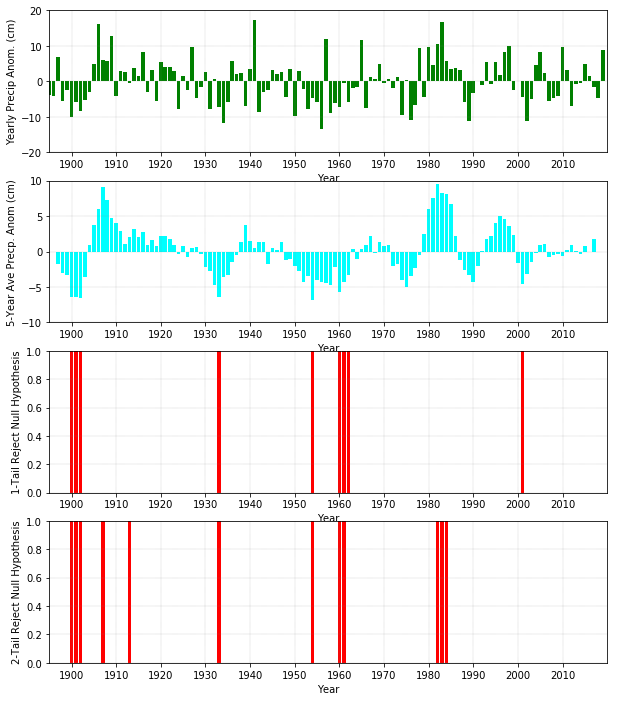

In [148]:
#figure 16
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(10,12))
ax1.bar(yearp,ppta,color='green')
ax1.set(xlim=(1895,2020),ylim=(-20,20))
ax1.set(xlabel="Year",ylabel='Yearly Precip Anom. (cm)')
ax1.set(xticks=decade_ticks)
ax2.bar(yearp,pm,color='cyan')
ax2.set(xlim=(1895,2020),ylim=(-10,10))
ax2.set(xlabel="Year",ylabel='5-Year Ave Precp. Anom (cm)')
ax2.set(xticks=decade_ticks)
ax3.bar(yearp,p_1side_rej,color='red')
ax3.set(xlim=(1895,2020),ylim=(0,1))
ax3.set(xlabel="Year",ylabel='1-Tail Reject Null Hypothesis')
ax3.set(xticks=decade_ticks)
ax4.bar(yearp,p_2side_rej,color='red')
ax4.set(xlim=(1895,2020),ylim=(0,1))
ax4.set(xlabel="Year",ylabel='2-Tail Reject Null Hypothesis')
ax4.set(xticks=decade_ticks)

ax1.grid(linestyle='--', color='grey', linewidth=.2)
ax2.grid(linestyle='--', color='grey', linewidth=.2)
ax3.grid(linestyle='--', color='grey', linewidth=.2)
ax4.grid(linestyle='--', color='grey', linewidth=.2)

plt.savefig('figure_3.16_2020.png')